# Objective

The goal of this project is to implement multiple linear regression from scratch and to learn to work with Numpy and Matplotlib.

In [2]:
# Import numpy, matplotlib and csv module 
import numpy as np 
import matplotlib.pyplot as plt # Plotting data
import csv # Reading CSV data

We will be using linear regression to predict housing prices per unit area in Singapore. The features that affect housing prices are (1) House age, (2) Distance to nearest MRT Station, (3) No. of Convenience stores, (4) Latitude, (5) Longitude.  The price will be expressed in terms of $/square meter

# Loading training data

In [3]:
training_x = []
training_y = []
with open("C:/Users/jiado/Downloads/Real estate data (Kaggle).csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    
    next(csv_reader) # Skip over the first line of headers
    
    for line in csv_reader:
        training_x.append(line[1:-1])
        training_y.append(line[-1])
        
# Creating numpy arrays to store the training data

x_train = np.array(training_x, dtype="float_")
y_train = np.array(training_y, dtype="float")

print(f"x_train : {x_train}, shape: {x_train.shape}")
print(f"y_train : {y_train}, shape: {y_train.shape}")
        

x_train : [[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 ...
 [2013.25      18.8      390.9696     7.        24.97923  121.53986]
 [2013.         8.1      104.8101     5.        24.96674  121.54067]
 [2013.5        6.5       90.45606    9.        24.97433  121.5431 ]], shape: (414, 6)
y_train : [ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   

# Normalise training data using Z-Score normalisation

In [4]:
def z_score_normalisation (raw_data, mean, stdev): # returns a z-score normalised data
    normalised_data = (raw_data - mean)/stdev
    return normalised_data
    
    

In [5]:
# Normalise all of our features
# Get the mean of each column in the form of an array
mean = np.mean(x_train, axis = 0)
print(mean)

[2013.14897101   17.71256039 1083.88568891    4.0942029    24.96903007
  121.53336109]


In [6]:
# Get the std deviation of each column in the form of an array
stdev = np.std(x_train, axis = 0)
print(stdev)

[2.81626494e-01 1.13787172e+01 1.26058439e+03 2.94200221e+00
 1.23951994e-02 1.53286366e-02]


In [7]:
# Begin normalising
normalised_x_train = np.copy(x_train)
normalised_x_train

array([[2012.917  ,   32.     ,   84.87882,   10.     ,   24.98298,
         121.54024],
       [2012.917  ,   19.5    ,  306.5947 ,    9.     ,   24.98034,
         121.53951],
       [2013.583  ,   13.3    ,  561.9845 ,    5.     ,   24.98746,
         121.54391],
       ...,
       [2013.25   ,   18.8    ,  390.9696 ,    7.     ,   24.97923,
         121.53986],
       [2013.     ,    8.1    ,  104.8101 ,    5.     ,   24.96674,
         121.54067],
       [2013.5    ,    6.5    ,   90.45606,    9.     ,   24.97433,
         121.5431 ]])

In [8]:
for row in normalised_x_train:
    for i in range(normalised_x_train.shape[1]):
        row[i] = z_score_normalisation(row[i], mean[i], stdev[i])

print(normalised_x_train)

[[-0.82368321  1.25562833 -0.79249504  2.00740743  1.12542986  0.44876222]
 [-0.82368321  0.15708622 -0.61661163  1.66750286  0.91244418  0.40113894]
 [ 1.54115111 -0.38779067 -0.41401527  0.30788458  1.48686011  0.68818339]
 ...
 [ 0.35873395  0.09556786 -0.54967846  0.98769372  0.82289338  0.42397202]
 [-0.52896662 -0.84478419 -0.77668389  0.30788458 -0.18475479  0.4768143 ]
 [ 1.24643452 -0.98539758 -0.78807071  1.66750286  0.42757905  0.63534112]]


In [9]:
# Compare contrast with scipy built in normalisation 
from scipy import stats
deep_copy2 = np.copy(x_train)
stats.zscore(deep_copy2, axis=0, ddof=1)

array([[-0.82268782,  1.25411095, -0.79153734,  2.00498156,  1.12406983,
         0.44821991],
       [-0.82268782,  0.15689638, -0.61586648,  1.66548775,  0.91134153,
         0.40065418],
       [ 1.5392887 , -0.38732204, -0.41351495,  0.30751251,  1.4850633 ,
         0.68735175],
       ...,
       [ 0.35830044,  0.09545237, -0.5490142 ,  0.98650013,  0.82189895,
         0.42345967],
       [-0.52832738, -0.8437633 , -0.7757453 ,  0.30751251, -0.18453152,
         0.47623808],
       [ 1.24492826, -0.98420677, -0.78711836,  1.66548775,  0.42706234,
         0.63457333]])

# It worked!


After normalising our values, it is time to start working on gradient descent and the cost function

# Single Prediction

In [10]:
def single_prediction(weights, features, bias):
    """
    Returns a single prediction of the linear regression model using a particular set of weights and a bias
    
    weights - A numpy array of weights
    features - A numpy array of training features
    bias - A scalar variable
    """
    p = np.dot(weights, features) + bias
    return p
    

# Cost Function

In [11]:
def compute_cost(weight, features, bias, targets):
    """
    Returns a scalar denoting the cost of the model
    
    Inputs:
    weight - ndarray of scalars denoting weights
    features - A numpy array of training features
    bias - A scalar variable
    targets - ndarray of scalars denoting the actual price per unit of the house
    """
    
    # m denotes the number of training examples
    m = features.shape[0]
    # cost variable 
    cost = 0
    for i in range(m):
        prediction = single_prediction(weight, features[i], bias)
        cost += (prediction - targets[i])**2
    
    cost /= 2*m

    return cost

In [12]:
# Create an initial bias and weights
w_initial = np.array([0.0,0.0,0.0,0.0,0.0,0.0], dtype="float")
b_initial = 2
compute_cost(w_initial, normalised_x_train, b_initial, y_train)

739.6318115942033

# Gradient Descent I

Computing the gradient for a particular feature

In [13]:
def compute_gradient(weights, features, bias, targets):
    """
    Returns the gradient of cost function wrt the weight attached to a feature
    and the gradient of cost function wrt the bias
    
    OUTPUT:
    dj_dw = ndarray: gradient of cost function wrt the weight attached to a feature
    dj_db = ndarray: gradient of cost function wrt the bias
    
    INPUT:
    
    weights - ndarray of scalars denoting weights
    features - A numpy array of training features
    bias - A scalar variable
    targets - ndarray of scalars denoting the actual price per unit of the house
    """
    m,n = features.shape 
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        difference = single_prediction(weights, features[i], bias) - targets[i]
        dj_db += difference
        for j in range(n):
            dj_dw[j] += difference * features[i][j]
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db
        

In [14]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(w_initial,normalised_x_train, b_initial, y_train)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-1.18900126  2.86161559  9.15442889 -7.75998233 -7.42433189 -7.11148708]
dj_dw at initial w,b: 
 -35.98019323671498


# Gradient Descent II

Actually implementing the gradient descent algorithm

In [15]:
def gradient_descent(weights, features, bias, targets, iterations, alpha, cost_function, gradient_function):
    """
    OUTPUT:
    1. A graph of cost function against number of iterations. Cost function should be decreasing else adjust learning rate alpha
    2. A table of cost function against number of iterations
    3. optimised_w - ndarray of weights after gradient descent
    4. optimised_b - scalar value of bias after gradient descent
    5. J_history - python list of past cost functions for graphing
    
    INPUT:
    1. weights - ndarray of scalars denoting INITIAL weights
    2. features - A numpy array of training features
    3. bias - A INITIAL scalar variable
    4. targets - ndarray of scalars denoting the actual price per unit of the house
    5. iterations - number of iterations of gradient descent to run
    6. alpha - learning rate 
    7. cost_function - A function to compute the cost of the model
    8. gradient_function - A function to compute the gradient of the model
    
    """
    
    # Create an array to store the values of cost function J and w for graphing later 
    J_history = []
    optimised_w = np.copy(weights) # To be returned
    optimised_b = bias # To be returned
    
    # Main code
    for num in range(iterations):
        # Calculate the gradient of cost wrt bias
        # Calculate the gradient of cost wrt weight for each feature
        dj_dw, dj_db = gradient_function(optimised_w, features, optimised_b, targets)
        
        # Adjust the values of w and b simultaneously
        optimised_w -= alpha * dj_dw
        optimised_b -= alpha * dj_db
        
        # Save cost J after each iteration
        cost = cost_function(optimised_w, features, optimised_b, targets)
        J_history.append(cost)
        
        # Print cost J every 20 iterations
        if num%20 == 0:
            print(f"Cost: {cost}, No. Of Iterations: {num}")
    
        
    # Return the optimised values of W and B
    return optimised_w, optimised_b,J_history
    
    
    
    
    
    

In [16]:
final_weights, final_bias, past_costs = gradient_descent(w_initial, normalised_x_train, b_initial, y_train, 7000, 10 ** -3, compute_cost, compute_gradient)

Cost: 738.078903190317, No. Of Iterations: 0
Cost: 707.8294139026439, No. Of Iterations: 20
Cost: 679.0568682585204, No. Of Iterations: 40
Cost: 651.6737721038147, No. Of Iterations: 60
Cost: 625.5990671618372, No. Of Iterations: 80
Cost: 600.7575734229181, No. Of Iterations: 100
Cost: 577.0794844055054, No. Of Iterations: 120
Cost: 554.4999100659654, No. Of Iterations: 140
Cost: 532.9584626589744, No. Of Iterations: 160
Cost: 512.3988813220783, No. Of Iterations: 180
Cost: 492.76869158195785, No. Of Iterations: 200
Cost: 474.01889636104767, No. Of Iterations: 220
Cost: 456.10369540576664, No. Of Iterations: 240
Cost: 438.98023036560164, No. Of Iterations: 260
Cost: 422.6083530291805, No. Of Iterations: 280
Cost: 406.95041447242846, No. Of Iterations: 300
Cost: 391.97107309770666, No. Of Iterations: 320
Cost: 377.63711974410774, No. Of Iterations: 340
Cost: 363.9173182300536, No. Of Iterations: 360
Cost: 350.78225985207536, No. Of Iterations: 380
Cost: 338.20423051000404, No. Of Iterat

Cost: 39.71612324518334, No. Of Iterations: 3360
Cost: 39.6826709915097, No. Of Iterations: 3380
Cost: 39.65045260780211, No. Of Iterations: 3400
Cost: 39.61942035844441, No. Of Iterations: 3420
Cost: 39.58952837184247, No. Of Iterations: 3440
Cost: 39.56073256745646, No. Of Iterations: 3460
Cost: 39.532990585693284, No. Of Iterations: 3480
Cost: 39.50626172054539, No. Of Iterations: 3500
Cost: 39.48050685486999, No. Of Iterations: 3520
Cost: 39.45568839820336, No. Of Iterations: 3540
Cost: 39.43177022701224, No. Of Iterations: 3560
Cost: 39.408717627285974, No. Of Iterations: 3580
Cost: 39.386497239378286, No. Of Iterations: 3600
Cost: 39.36507700500916, No. Of Iterations: 3620
Cost: 39.344426116344046, No. Of Iterations: 3640
Cost: 39.324514967067294, No. Of Iterations: 3660
Cost: 39.30531510537267, No. Of Iterations: 3680
Cost: 39.28679918879508, No. Of Iterations: 3700
Cost: 39.268940940811774, No. Of Iterations: 3720
Cost: 39.2517151091437, No. Of Iterations: 3740
Cost: 39.2350974

Cost: 38.68996281924033, No. Of Iterations: 6720
Cost: 38.689177977495234, No. Of Iterations: 6740
Cost: 38.68839930377481, No. Of Iterations: 6760
Cost: 38.687626707413166, No. Of Iterations: 6780
Cost: 38.68686010030602, No. Of Iterations: 6800
Cost: 38.68609939681808, No. Of Iterations: 6820
Cost: 38.685344513694034, No. Of Iterations: 6840
Cost: 38.68459536997328, No. Of Iterations: 6860
Cost: 38.683851886907355, No. Of Iterations: 6880
Cost: 38.68311398788096, No. Of Iterations: 6900
Cost: 38.68238159833576, No. Of Iterations: 6920
Cost: 38.68165464569732, No. Of Iterations: 6940
Cost: 38.680933059304365, No. Of Iterations: 6960
Cost: 38.68021677034137, No. Of Iterations: 6980


Text(0.5, 0, 'No. of iterations')

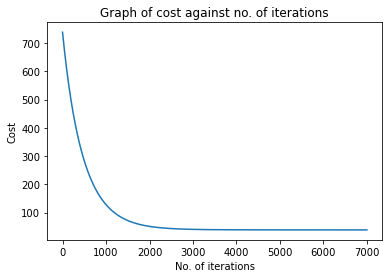

In [17]:
fig, ax = plt.subplots()
ax.plot(past_costs)
ax.set_title("Graph of cost against no. of iterations")
ax.set_ylabel("Cost")
ax.set_xlabel("No. of iterations")

In [18]:
print(f"Final weights: {final_weights}, Final bias: {final_bias}")

Final weights: [ 1.40532147 -3.07336814 -4.70333735  3.50362026  3.016736    0.52635476], Final bias: 37.94749825692232


# Predicting Values

In [19]:
def predict_price(inputs, avg, stdv, w, b):
    """
    returns:
    predicted_price - scalar 
    
    arguments:
    inputs - ndarray of features of the house whose price is to be predicted
    avg - ndarray of mean values 
    stdv - ndarray of stdev 
    w - ndarray of weights
    b - scalar value of bias 
    """
    # normalise the inputs
    inputs -= avg
    inputs /= stdv
    # Calculate predicted price
    predicted_price = np.dot(w, inputs) + b
    
    return predicted_price

In [20]:
predict_price(np.array([2012.917, 14.7, 1360.139, 1, 24.95204, 121.5484]), mean, stdev, final_weights, final_bias)

29.269419888671816

# Comparing the predicted values with targets

In [21]:
predicted_costs = []
for i in range(x_train.shape[0]): 
    prediction = predict_price(x_train[i], mean,stdev,final_weights,final_bias)
    real_cost = y_train[i]
    predicted_costs.append(prediction)
    print(f"Predicted Cost: {prediction}, Real Cost: {real_cost}")

Predicted Cost: 47.32284822186899, Real Cost: 37.9
Predicted Cost: 48.01334868626225, Real Cost: 42.2
Predicted Cost: 49.17879165674417, Real Cost: 47.3
Predicted Cost: 48.764620106743365, Real Cost: 54.8
Predicted Cost: 46.29858456122804, Real Cost: 43.1
Predicted Cost: 30.86427794008583, Real Cost: 32.1
Predicted Cost: 38.79836643320179, Real Cost: 40.3
Predicted Cost: 46.90503801534037, Real Cost: 46.7
Predicted Cost: 9.639146198438887, Real Cost: 18.8
Predicted Cost: 34.26821696875347, Real Cost: 22.1
Predicted Cost: 32.94810108505189, Real Cost: 41.4
Predicted Cost: 53.12148257388163, Real Cost: 58.1
Predicted Cost: 40.5423585508142, Real Cost: 39.3
Predicted Cost: 26.81276012400277, Real Cost: 23.8
Predicted Cost: 46.01106671720616, Real Cost: 34.3
Predicted Cost: 38.33843565874341, Real Cost: 50.5
Predicted Cost: 50.88826977310865, Real Cost: 70.1
Predicted Cost: 36.49564284105658, Real Cost: 37.4
Predicted Cost: 46.836798407890534, Real Cost: 42.3
Predicted Cost: 47.28290176243

# Comparing Using Scatterplots

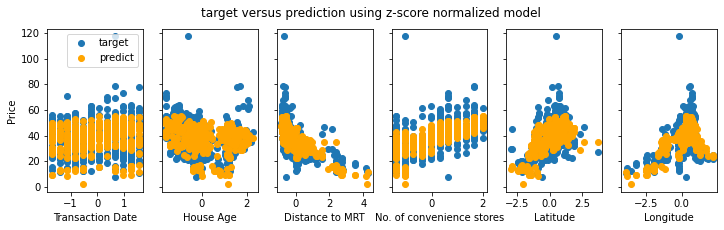

In [27]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,6,figsize=(12,3),sharey=True)
features = ["Transaction Date", "House Age", "Distance to MRT", "No. of convenience stores","Latitude", "Longitude"]
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(features[i])
    ax[i].scatter(x_train[:,i],predicted_costs,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()